# Procesando datos externos

Python puede manejar datos además de aquellos dentro del Script. En problemas de la vida real, de hecho, se suelen manejar una cantidad enorme de datos. Por ejemplo, si somos programadores de una empresa multinacional, debemos estar preparados para poder procesar todos los datos de login y contraseña de todos los usuarios en vivo. 

Un primer método es el procesar archivos de texto. Se hace con la siguiente sintaxis:

In [ ]:
'''
with open('nombre_archivo', 'ar(+)w') as variable:
    texto = variable.read()
Entonces va a guardar un string con todo el texto en el. Un enter se
guarda como '\n'.
'''

Analicemos todos los elementos de ese bloque:

1. `with`: Es la palabra reservada que le avisa a Python que estaremos abriendo un archivo. 

2. `open('nombre_archivo', ar(+)w') as variable`: Es el objeto que representa el archivo que queremos abrir. El string `nombre_archivo` debe dar la ruta exacta del archivo que queremos escribir. Si el archivo y el script poseen la misma ruta, entonces solo debemos poner el nombre del archivo (La extensión del archivo es parte del nombre!). El string `'ar(+)w'` le dice a Python que haremos con el archivo:
    1. `r`: Solo para leer el contenido. Si no hay archivo, lanza error.
    2. `r+`: Puede leer y sobreescribir, sin borrar lo que ya habia antes. Si no hay archivo, lanza error.
    3. `a`: Va a escribir todo al final, sin borrar lo que habia. Si no hay archivo, lo crea.
    4. `w`: Va a sobreescribir todo lo que se agregue. Si no existe el archivo, se crea.
    
Finalmente, `variable` es un objeto que representa al archivo. Podemos llamarlo como querramos.
3. `variable.read()`: Nos permite leer todo el contenido del archivo, devuelve un string siempre. Observe que esta línea de código debe estar indentada, es el único lugar donde `variable` está definida.

Entonces, al final del código, `texto` es una variable de tipo string

En mi computadora tengo un archivo que se llama `cuento.txt`, que se encuentra en la carpeta `Archivos`, en el mismo directorio que mi script. Para abrirlo y leer su contenido entonces escribo:

In [7]:
with open('Archivos\\cuento.txt', 'r', encoding = 'utf8') as cuento:
    datos = cuento.read()

print(datos)

Sapurũ, kuñataĩ porã peteĩ, oikóvante oikoha rupi omoherakuã ndaje omendáne haguã kuimba’e ogueropojáiva chupe jopói iporãvévare.

Ñanduguasu apysápe oguahẽ upéva. Ymaite guivéma niko omyendy ikorasõme ra’e hese imborayhu. Ñanduguasu oñemoĩ omboguyguy ka’aguy ryepy, jahechápa ndojuhúi peteĩ mba’e iporã ambuéva ha ikatúneva Sapurũ ohecharamo. Upéicha oiko kuévo hesaho sapy’a peteĩ ñandu renimbo rehe, ysapýpe iñakỹ ha ojajaipáva hína.

Ombopy’aroryete chupe, oñemboja mbegue katuete ha py’a tytýipe ojapyhývo, ikusugue ipópe. Ñembyasy asýpe ojere hógape omombe’u ipýpe ipo’a’ỹ. Isy he’i chupe:

-Ani rejepy’apy che memby. Heta upeichagua oĩ ka’aguýre, jaha jaheka ndéve.

Oike ka’aguýre hikuái ha márõ ndojuhúi mba’eve.

Upémarõ oporandu isy Ñanduguasúpe mba’eichaguápa pe mba’e ohecha va’ekue, ha ohendupa porã rire, oñemoĩ ohekýi iñakãrague morotĩrotĩmava ohóvo ha oipyaha ipype peteĩ ñandu renimbo joguahaite.

Ñanduguasu ome’ẽ Sapurũme isy rembiapokue ha ombojoaju hikuái hekove kuéra. Upe guiv

Observe que necesité agregar `encoding = 'utf8` para poder leer el archivo, puesto que el guaraní tiene caracteres especiales. El punto importante es que pudimos leer todo el contenido de un archivo de texto. Observe lo que pasa si queremos abrir un archivo que no existe en el modo `r`:

In [8]:
with open('noexiste.txt', 'r') as file:
    print(file.read())

FileNotFoundError: [Errno 2] No such file or directory: 'noexiste.txt'

`FileNotFOundError` es síntoma de que se quiere abrir un archivo que no ha sido creado aún. Lo mismo sucede en el modo `r+`. Los modos `a` y `w` crean el archivo en caso de que no exista:

In [9]:
with open('noexiste.txt', 'w') as arch:
    texto = arch.read()
print(texto)

UnsupportedOperation: not readable

Sin embargo, los modos `a` y `w` no permiten leer el archivo, solo agregar/sobreescribir datos. Es por eso que nos lanza el error `not readable` (no leíble). Para estos dos tipos, se usa la sintaxis `arch.write(string)`, para escribir un string en arch. 

In [10]:
with open('data3.txt', 'a') as archivo:
    archivo.write("Hola mundo")


Ahora preguntemos por el contenido de data3.txt:

In [11]:
with open('data3.txt', 'r') as archivo:
    print(archivo.read())

Esta es una pruebaHola mundo


Se agregó `Hola Mundo`. En otra sección veremos la diferencia entre `r+`, `a` y `w`. Primero notemos que si una línea de código no está indentada, entonces la variable `archivo` ya no está definida:

In [12]:
with open('data3.txt', 'r') as archivo:
    datos = archivo.read()
    
datos2 = archivo.read()

ValueError: I/O operation on closed file.

Nos dice que archivo ya se ha cerrado. Sin emabargo, la variable `datos` sigue siendo accesible:

In [13]:
print(datos)

Esta es una pruebaHola mundo


Esto es debido a que es muy costoso para Python mantener abiertos archivos grandes por mucho tiempo (Y peligroso!). Por lo tanto el objeto de archivo de texto es accesible únicamente dentro de la estructura `with`. 

### Ejercicios.

1. En el cuento corto cuento.txt, cuente la cantidad de:
    1. Vocales (Con o sin acento)
    2. Vocales acentuadas (Nasal o diacrítico)
    3. Vocales con acento Nasal
2. Haga un programa que haga al usuario ingresar una serie de numeros hasta que se ingrese el número $0$. Guarde en un archivo llamado resultado.txt la suma de todos los números ingresados.

## Las funciones `tell()` y `seek()`.

Veamos un ejemplo, con el mismo archivo `data3.txt`.

In [15]:
with open('data3.txt', 'r') as archivo:
    print("Imprimireos el contenido del archivo:")
    print(archivo.read())
    print("-------------")
    print("Imprimiremos el contenido del archivo por segunda vez:")
    print(archivo.read())
    print("-------------")

Imprimireos el contenido del archivo:
La fecha de hoy es 
4 de Agosto de 2020
-------------
Imprimiremos el contenido del archivo por segunda vez:

-------------


¿Que pasó? ¿Acaso no tenía que imprimir el contenido dos veces?. Lo que sucede es que Python, al abrir un archivo, crea lo que se llam un **puntero**. Este puntero es un número que le indica a Python dónde se encuentra dentro del archivo, y funciona muy parecido al indexado de una lista o string.

El puntero inicia en `0`, lo que indica que Python se encuentra al comienzo del archivo, y puede tener cualquier valor positivo. Entonces, lo que la función `read` realmente hace es leer todos los caracteres **desde el puntero hasta el final**, coloca el puntero al final del último caracter que se leyó. 

Cuando escribimos `archivo.read()` por primera vez, Python tiene el puntero en `0` y lee todos los caracteres hasta el final, que es también donde coloca el puntero. Cuando escribimos `archivo.read()` por segunda vez, no hay caracteres entre el puntero y el final del archivo, entonces no se imprime nada.

Existen dos formas básicas de manipular un puntero de un archivo en Python:

1. `archivo.tell()`: Devolverá un entero que indica la posición del puntero actualmente.

2. `archivo.seek(n)`:  Moverá el puntero a la posición número `n` del archivo.

Si queremos entonces imprimir el archivo de `data3.txt` podemos pedirle que vuelva al comienzo:

In [16]:
with open('data3.txt', 'r') as archivo:
    print("Imprimireos el contenido del archivo:")
    print(archivo.read())
    print("-------------")
    print("Imprimiremos el contenido del archivo por segunda vez:")
    archivo.seek(0)
    print(archivo.read())
    print("-------------")

Imprimireos el contenido del archivo:
La fecha de hoy es 
4 de Agosto de 2020
-------------
Imprimiremos el contenido del archivo por segunda vez:
La fecha de hoy es 
4 de Agosto de 2020
-------------


Veamos que ocurre si le preguntamos donde está el puntero en varios puntos:

In [17]:
with open('data3.txt', 'r') as archivo:
    print("El puntero está en la posición: ", archivo.tell())
    print(archivo.read())
    print("-------------")
    print("El puntero está ahora en la posición :", archivo.tell())


El puntero está en la posición:  0
La fecha de hoy es 
4 de Agosto de 2020
-------------
El puntero está ahora en la posición : 40


En realidad, `seek()` tiene otras funcionalidades interesantes, pero no las cubriremos en este curso. Para más información, pueden consultar la documentación.

### Ejercicios

>1. En el archivo sisifo.txt, disponible en la carpeta Archivos de la pagina del curso, ábralo usando un script de Python, y manipúlelo de la siguiente manera:
>>1. Imprima el texto desde la posición 909.
>>2. ¿En qué posición empieza la palabra "arte"?
>>3. Intercambie la palabra "Sisifo" por tu nombre.
>>4. Imprima el texto resultante

# Extras!
## 1. Diferencias entre `r+`, `a`, `w`.


Además de que `r+` es el único modo en el cual podemos leer y escribir al mismo tiempo, existen unas pequeñas diferencias entre estos tres modos. 
Supongamos que tengo el siguiente archivo en mi directorio
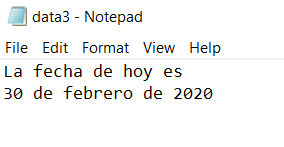

Abajo siguen los tres posibles bloques de código y sus respectivos resultados

In [18]:
with open('data3.txt', 'r+') as archivo:
    archivo.write("Hola mundo")

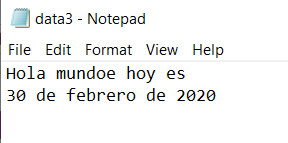

In [19]:
with open('data3.txt', 'a') as archivo:
    archivo.write("Hola mundo")

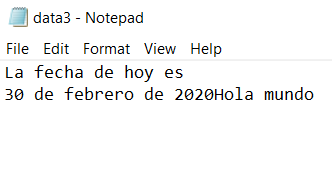

In [20]:
with open('data3.txt', 'w') as archivo:
    archivo.write("Hola mundo")

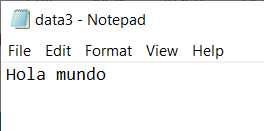

Las diferencias están resumidas en la siguiente tabla:

| `r+` | `a` | `w` |
|:-----|:----|:----|
|-Agrega el texto en el lugar del puntero |-Agrega el texto al final del archivo | -Agrega el texto al comienzo del archivo|
|-Deja el resto del texto igual | -Deja el resto del texto igual | -Elimina el resto del texto|

### Ejercicios
1-) En un script, pedir al usuario que ingrese tres dígitos, guardarlos en un archivo llamado capicua.txt y finalmente agregar en el mismo archivo el menor número capicúa que empieza con los tres dígitos ingresados por el usuario, preservando el orden.
    
    Los números capicúas se leen igual del derecho y del revés. Ejemplo: Si el usuario ingresa '1', '3', '3', entonces se debe añadir un '1' obteniendo '1331' que es un número capicúa.

2-) Determine si los valores del archivo Par_Impar.txt (que es un número del tipo string, por ende debe cambiarse al tipo entero), es par o impar. En caso de que sea par reemplazar el contenido con 1, en el caso contrario se debe reemplaza con 0.

3-) Visualizar el texto del archivo Filosofia_del_Dia.txt y completar la parte final con una de las opciones:

    a. yo soy.
    b. luego existo.
    c. es poder.
4-) Tenemos el string 'Ellos nos crearon pero ahora nos tienen miedo. Porque no pueden manipular lo que queremos.". En cambio en el archivo Verso.txt adjuntado sólo se encuentra la segunda oración. Escriba en el archivo la parte restante, agregue al final del archivo la cantidad de letras utilizadas e imprima el archivo final, antes de guardarlo."